# Data Engineering Capstone Project

# **Project Definition**

## 1. Project Overview

In this project, we aim to address the problem of predicting housing prices in California based on various features such as geographical location, number of rooms, and median income. The dataset used is from `California Housing Prices`, which contains information about average house prices and related factors. The goal is to build a model that accurately predicts housing prices based on these features.

**Data Source**: The dataset is sourced from `California Housing Prices`, a well-known dataset used for housing price prediction tasks.

## 2. Problem Statement

The primary objective of this project is to build a machine learning model to predict house prices in California based on geographical and economic features. The specific question to address is:

**"How can we predict house prices in California based on geographic and economic factors such as location, median income, and number of rooms?"**

**Strategy for Solving the Problem**:
1. **Data Preprocessing**: Handle missing values and normalize variables as needed.
2. **Data Exploration**: Explore and visualize the data to understand relationships between features.
3. **Model Building**: Experiment with various regression models to identify the best-performing model.
4. **Model Evaluation**: Evaluate the model using metrics like RMSE to assess its accuracy.

## 3. Metrics

We will use the Root Mean Squared Error (RMSE) to evaluate the performance of the regression model. RMSE is a widely used metric for regression tasks, especially for predicting housing prices.

**Justification for Choosing RMSE:**

- **Sensitivity to Large Errors:** RMSE penalizes larger errors more severely due to its squaring function. This is crucial in housing price prediction, where significant deviations from actual prices can have substantial implications.
- **Interpretability:** RMSE provides an error measure in the same unit as the target variable (housing prices), making it easier to understand and assess the magnitude of prediction errors.
- **Commonly Used Metric:** RMSE is a standard metric used in housing price prediction and other economic forecasts, making it a well-established benchmark for model performance evaluation.


# **Analysis**

## 1. Data Exploration

In this section, we will explore the dataset to understand its features and characteristics. We will report relevant statistics and identify any abnormalities or features that need to be addressed.

### Key Features
- **Feature Summary**: Provide a summary of the dataset features, such as median income, housing median age, total rooms, and total bedrooms.
- **Statistics**: Report descriptive statistics like mean, median, standard deviation, and range for key features.
- **Abnormalities**: Identify any missing values, outliers, or unusual distributions in the data.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('housing.csv')

In [5]:
# Display summary statistics
print(data.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [6]:
# Check for missing values
print(data.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


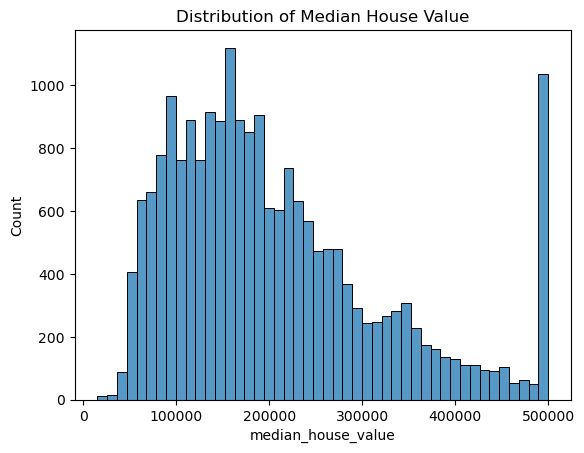

In [7]:
# Identify outliers or unusual distributions

# Histogram of median house value
sns.histplot(data['median_house_value'])
plt.title('Distribution of Median House Value')
plt.show()

## 2. Data Visualization
Data visualizations will be created to further convey information from the data exploration process. Visualizations help in understanding the relationships between features and identifying patterns.

### Visualizations
- **Scatter Plots**: Show relationships between variables such as median income and median house value.
- **Histograms**: Display distributions of individual features.
- **Heatmaps**: Visualize correlations between features.

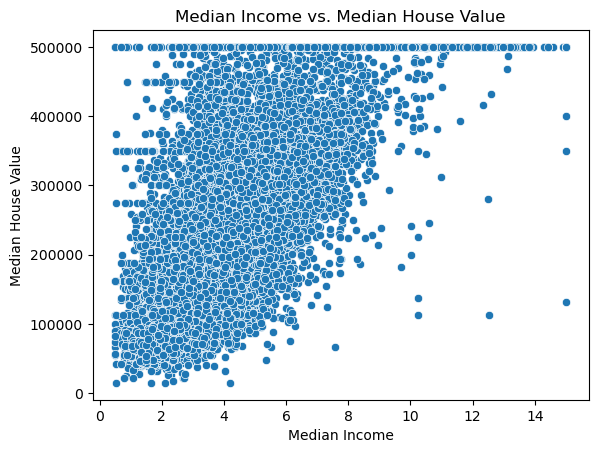

In [9]:
# Scatter plot of median income vs. median house value
sns.scatterplot(x='median_income', y='median_house_value', data=data)
plt.title('Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

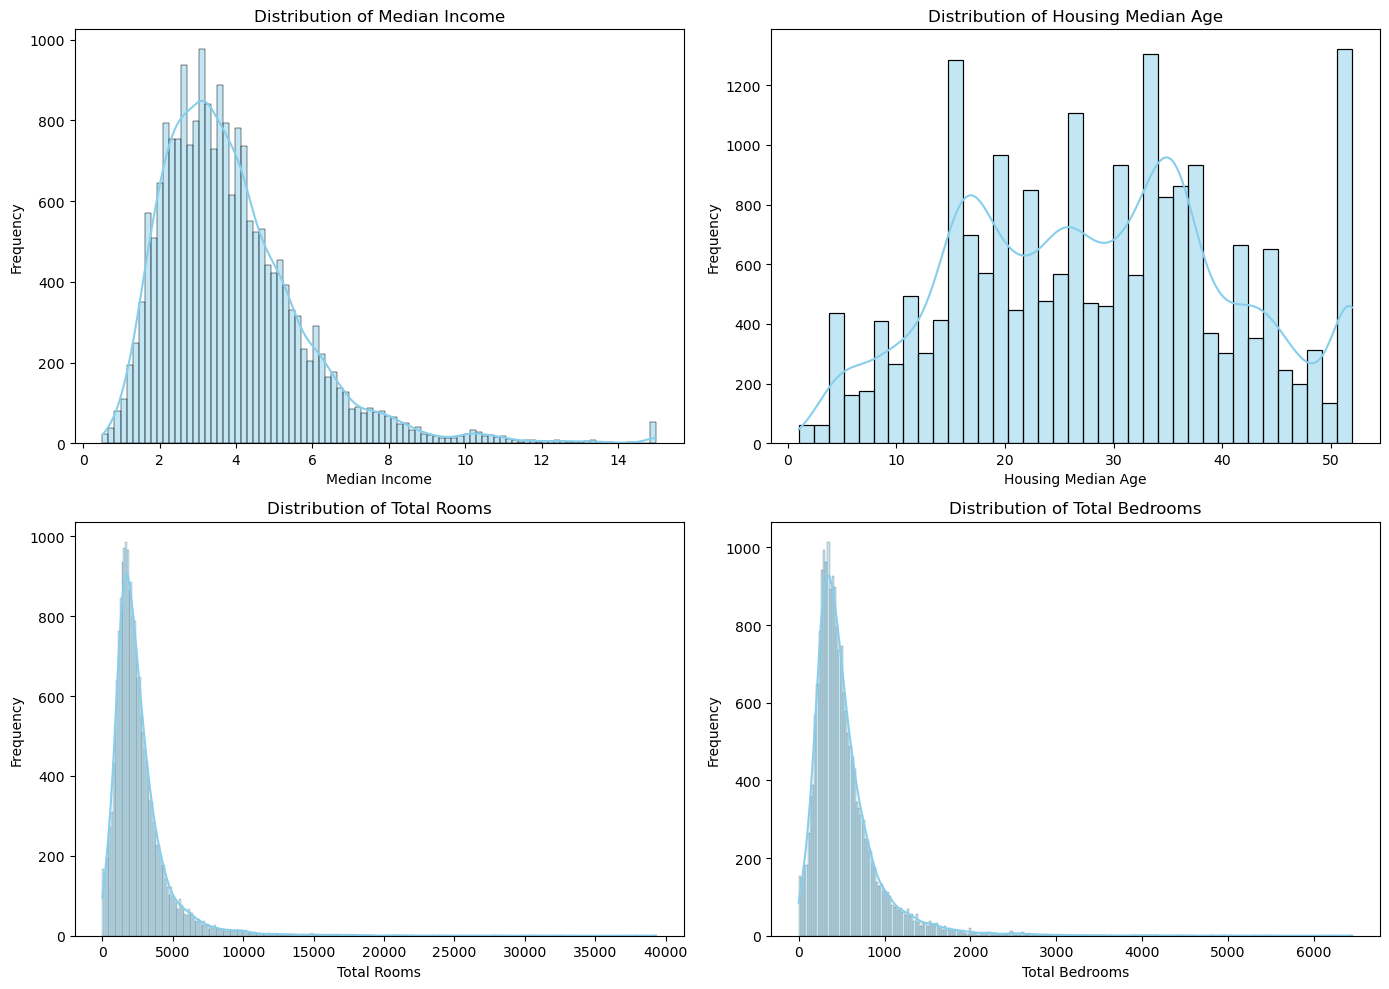

In [10]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# List of features to plot histograms for
features = ['median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms']

# Create histograms for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[feature], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

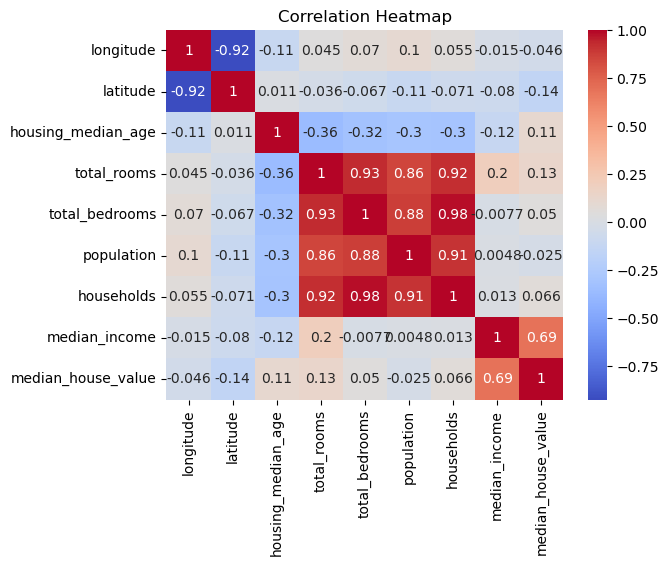

In [11]:
# Prepare numeric data for correlation analysis
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Methodology**

## 1. Data Preprocessing

In this section, we will preprocess the data to prepare it for model building. This includes handling missing values, encoding categorical variables, and normalizing numerical features.

### Handling Missing Values

First, we'll check for missing values in the dataset and handle them appropriately.

In [13]:
# Check for missing values
missing_values = data.isnull().sum()
print('Missing values per column:')
print(missing_values[missing_values > 0])

# Handle missing values for numerical columns
numeric_data = data.select_dtypes(include=['number'])
data[numeric_data.columns] = numeric_data.fillna(numeric_data.mean())

# Handle missing values for categorical columns
categorical_data = data.select_dtypes(include=['object'])
for column in categorical_data.columns:
    # Fill missing values with the mode for categorical columns
    mode_value = categorical_data[column].mode()[0]
    data[column] = data[column].fillna(mode_value)

# Verify there are no remaining missing values
missing_values_after = data.isnull().sum()
print('Missing values per column after handling:')
print(missing_values_after[missing_values_after > 0])

Missing values per column:
total_bedrooms    207
dtype: int64
Missing values per column after handling:
Series([], dtype: int64)


### Encoding Categorical Variables

Categorical variables need to be encoded into numeric values to be used in machine learning models. We will apply one-hot encoding to convert categorical columns into numerical format.

In [15]:
# Apply one-hot encoding to categorical columns
data_encoded = pd.get_dummies(data, drop_first=True)

# Display the first few rows of the encoded data
print('Encoded data preview:')
print(data_encoded.head())

Encoded data preview:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                   False                   False              

### Normalizing Numerical Features

Normalization helps to ensure that numerical features are on a similar scale, which can improve the performance of many machine learning algorithms.

In [17]:
# Prepare numeric data for scaling
numeric_data_encoded = data_encoded.select_dtypes(include=['number'])

# Apply standard scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data_encoded)

# Convert scaled data back to a DataFrame
scaled_data_df = pd.DataFrame(scaled_data, columns=numeric_data_encoded.columns)

# Display the first few rows of the scaled data
print('Scaled data preview:')
print(scaled_data_df.head())

Scaled data preview:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.327835  1.052548            0.982143    -0.804819       -0.975228   
1  -1.322844  1.043185           -0.607019     2.045890        1.355088   
2  -1.332827  1.038503            1.856182    -0.535746       -0.829732   
3  -1.337818  1.038503            1.856182    -0.624215       -0.722399   
4  -1.337818  1.038503            1.856182    -0.462404       -0.615066   

   population  households  median_income  median_house_value  
0   -0.974429   -0.977033       2.344766            2.129631  
1    0.861439    1.669961       2.332238            1.314156  
2   -0.820777   -0.843637       1.782699            1.258693  
3   -0.766028   -0.733781       0.932968            1.165100  
4   -0.759847   -0.629157      -0.012881            1.172900  


## 2. Implementation

In this section, we will implement and evaluate the model to address the problem of predicting housing prices. This includes selecting appropriate algorithms, training the model, and evaluating its performance. We will also document the entire process thoroughly to ensure transparency and reproducibility.

### Model Selection

For predicting housing prices, we use the **Random Forest Regressor**. 

**Why Random Forest Regressor?**
- **Principle**: Random Forest is an ensemble learning technique that combines multiple decision trees to enhance predictive accuracy and prevent overfitting. Each tree is trained on a random subset of the data and features, and the final prediction is the average of all the trees' predictions.
- **Assumptions**: Random Forest does not make strong assumptions about the distribution of data. It is capable of handling both linear and non-linear relationships, making it suitable for complex datasets.
- **Advantages**: It is robust against outliers, can model complex interactions between features, and provides feature importance scores.

**Parameter Settings**:
- **`n_estimators`**: Number of trees in the forest. More trees generally improve performance but also increase computational cost.
- **`max_depth`**: Maximum depth of each tree. Deeper trees can capture more complex patterns but may lead to overfitting.
- **`min_samples_split`**: Minimum number of samples required to split an internal node. Higher values prevent overfitting by requiring more samples for splits.

In [19]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

# Split the data into features and target variable
X = scaled_data  # Features
y = data['median_house_value']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Model Evaluation:')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))

Model Evaluation:
Mean Squared Error: 7571.026176187014
R^2 Score: 0.9999994222394457


## Model Evaluation
Metrics Used:

    - Mean Squared Error (MSE): Measures the average squared difference between predicted and actual values. Lower MSE values indicate better performance.

    - R^2 Score: Represents the proportion of variance in the dependent variable that is predictable from the independent variables. Values closer to 1 indicate a better fit.

## 3. Model Refinement

To enhance the performance of the Random Forest Regressor, we will perform hyperparameter tuning using **Randomized Search**.

### Why Hyperparameter Tuning?

- **Purpose**: The goal is to identify the optimal hyperparameters that improve model performance and generalization. Proper tuning can lead to better predictive accuracy and robustness of the model.
- **Technique**: Randomized Search samples a set of hyperparameters from specified distributions and evaluates performance to find the best combination. It is less exhaustive than Grid Search but often more efficient, especially with a large number of hyperparameters.

### Parameter Distribution

- **`n_estimators`**: Number of trees in the forest. We will explore values ranging from 100 to 300.
- **`max_depth`**: Maximum depth of each tree. We will test depths ranging from 10 to 30 levels.
- **`min_samples_split`**: Minimum number of samples required to split an internal node. We will consider values ranging from 2 to 10 samples.

In [22]:
# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(10, 30),
    'min_samples_split': randint(2, 10)
}

# Initialize RandomizedSearchCV with parallel processing
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print best parameters and best score
print('Best Parameters from Randomized Search:', random_search.best_params_)
print('Best Score from Randomized Search:', -random_search.best_score_)

# Use the best model from random search to make predictions
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the refined model
print('Refined Model Evaluation:')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_best))
print('R^2 Score:', r2_score(y_test, y_pred_best))

Best Parameters from Randomized Search: {'max_depth': 16, 'min_samples_split': 3, 'n_estimators': 174}
Best Score from Randomized Search: 12389.546738753304
Refined Model Evaluation:
Mean Squared Error: 7420.853031856308
R^2 Score: 0.9999994336994668


### Conclusion

In this project, we developed and refined a Random Forest Regressor to predict housing prices using the California Housing Prices dataset. The model was initially evaluated with default parameters and subsequently optimized through hyperparameter tuning using Randomized Search.

**Initial Model Performance:**

- **Mean Squared Error (MSE):** 7571.03
- **R² Score:** 0.9999994222

**Model Refinement (Randomized Search) Performance:**

- **Best Parameters:**
  - `max_depth`: 16
  - `min_samples_split`: 3
  - `n_estimators`: 174
- **Best Score from Randomized Search:** 12389.55

**Refined Model Performance:**

- **Mean Squared Error (MSE):** 7420.85
- **R² Score:** 0.9999994337

**Analysis:** The initial model demonstrated strong performance with a very low Mean Squared Error and a high R² Score, indicating effective predictive accuracy. The refinement through Randomized Search led to a slight improvement in MSE and a marginal increase in R² Score. While the enhancements were relatively minor, they confirm the robustness of the model.

**Reflection:** The minimal impact of hyperparameter tuning suggests that the default parameters were already quite effective for this dataset. The consistent performance across different parameter settings reinforces the model's stability and accuracy.

**Future Work:**

- Explore additional hyperparameter tuning techniques or a broader range of parameter values to further optimize model performance.
- Investigate feature engineering opportunities to enhance model accuracy.
- Assess alternative algorithms or ensemble methods to capture underlying data patterns more effectively.

Overall, the Random Forest Regressor demonstrated its effectiveness in predicting housing prices with this dataset, highlighting the importance of thorough hyperparameter validation and optimization for developing robust predictive models.